In [119]:
import os 
import pandas as pd
import matplotlib.pyplot as plt

for root, dirs, files in os.walk('files'):
    for file in files:
        print(os.path.join(root, file))

files\IMDb_All_Genres_etf_clean1.csv


In [120]:
#Reading data to a Pandas DataFrame
df = pd.read_csv('files\IMDb_All_Genres_etf_clean1.csv')

<h2>Preliminary Data analyzes</h2>

In [121]:
#shape = rows x columns
df.shape

(5562, 10)

In [122]:
#Information
df.info()

#Notice: 
    #that there is no null value anyway
    #data types for numeric types are ok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5562 entries, 0 to 5561
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Movie_Title    5562 non-null   object 
 1   Year           5562 non-null   int64  
 2   Director       5562 non-null   object 
 3   Actors         5562 non-null   object 
 4   Rating         5562 non-null   float64
 5   Runtime(Mins)  5562 non-null   int64  
 6   Censor         5562 non-null   object 
 7   Total_Gross    5562 non-null   object 
 8   main_genre     5562 non-null   object 
 9   side_genre     5562 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 434.7+ KB


In [45]:
#Correlation between columns
df.corr(numeric_only=True)

,Year,Rating,Runtime(Mins)
Year,1.000000,-0.291711,0.022971
Rating,-0.291711,1.000000,0.323256
Runtime(Mins),0.022971,0.323256,1.000000


In [53]:
#Statistical Information
df.describe()

#Notice that although There is no corelation betweem columns, there ir a correlation between number of movies and their year. Despite the oldest movie is from 1920, just 25% of them are from before 1997. This will be ilustrated at the chart down below.

,Year,Rating,Runtime(Mins)
count,5562.000000,5562.000000,5562.000000
mean,2002.792521,6.755861,112.226717
std,16.143990,0.937133,21.612655
min,1920.000000,1.000000,45.000000
25%,1997.000000,6.200000,97.000000
50%,2007.000000,6.800000,108.000000
75%,2014.000000,7.400000,123.000000
max,2022.000000,9.300000,321.000000


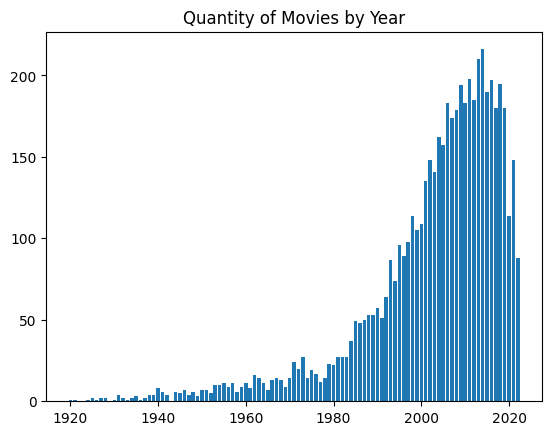

In [212]:
#Chart to explain the point above
qtd_year = df.groupby('Year')['Year'].count().reset_index(name='qtd')
plt.bar(df['Year'].value_counts().index, df['Year'].value_counts().values)
plt.title('Quantity of Movies by Year')
plt.show()